## Notebook 7: 

This is an IPython notebook. Most of the code is composed of bash scripts, indicated by %%bash at the top of the cell, otherwise it is IPython code. This notebook includes code to download, assemble and analyze a published RADseq data set.

In [2]:
### Notebook 7
### Data set 7 (Danio)
### Authors: McCluskey (20xx)
### Data Location: SRP065811 

## Download the sequence data
Sequence data for this study are archived on the NCBI sequence read archive (SRA). Below I read in SraRunTable.txt for this project which contains all of the information we need to download the data. 

+ Project SRA: SRP065811 
+ BioProject ID: PRJNA299298
+ SRA link: http://trace.ncbi.nlm.nih.gov/Traces/study/?acc=SRP065811

In [1]:
%%bash
## make a new directory for this analysis
mkdir -p empirical_7/fastq/

#### For each ERS (individuals) get all of the ERR (sequence file accessions).

In [4]:
## IPython code
import pandas as pd
import numpy as np
import urllib2
import os

## open the SRA run table from github url
url = "https://raw.githubusercontent.com/"+\
      "dereneaton/RADmissing/master/empirical_7_SraRunTable.txt"
intable = urllib2.urlopen(url)
indata = pd.read_table(intable, sep="\t")

## print first few rows
print indata.head()

    BioSample_s Experiment_s Library_Name_s  MBases_l  MBytes_l  \
0  SAMN04233193   SRX1425835         Daes_f       304       264   
1  SAMN04233194   SRX1425836         Daes_m       350       303   
2  SAMN04233195   SRX1425837         Dalb_f       422       364   
3  SAMN04233196   SRX1425838         Dalb_m       675       577   
4  SAMN04233197   SRX1425839         Dcho_f       269       234   

           Organism_s       Run_s SRA_Sample_s Sample_Name_s   sex_s  \
0    Danio aesculapii  SRR2912269   SRS1152558        Daes_f  female   
1    Danio aesculapii  SRR2912270   SRS1158108        Daes_m    male   
2  Danio albolineatus  SRR2912271   SRS1158107        Dalb_f  female   
3  Danio albolineatus  SRR2912272   SRS1158106        Dalb_m    male   
4       Danio choprai  SRR2912273   SRS1158105        Dcho_f  female   

      ...        LoadDate_s Platform_s ReleaseDate_s SRA_Study_s    age_s  \
0     ...      Nov 10, 2015   ILLUMINA  Nov 11, 2015   SRP065811  Unknown   
1     ... 

In [10]:
def wget_download(SRR, outdir, outname):
    """ Python function to get sra data from ncbi and write to
    outdir with a new name using bash call wget """
    
    ## get output name
    output = os.path.join(outdir, outname+".sra")
    
    ## create a call string 
    call = "wget -q -r -nH --cut-dirs=9 -O "+output+" "+\
           "ftp://ftp-trace.ncbi.nlm.nih.gov/"+\
           "sra/sra-instant/reads/ByRun/sra/SRR/"+\
           "{}/{}/{}.sra;".format(SRR[:6], SRR, SRR)
        
    ## call bash script
    ! $call 

Here we pass the SRR number and the sample name to the `wget_download` function so that the files are saved with their sample names. 

In [11]:
for ID, SRR in zip(indata.Library_Name_s, indata.Run_s):
    wget_download(SRR, "empirical_7/fastq/", ID)

In [12]:
%%bash
## convert sra files to fastq using fastq-dump tool
## output as gzipped into the fastq directory
fastq-dump --gzip -O empirical_7/fastq/ empirical_7/fastq/*.sra

## remove .sra files
rm empirical_7/fastq/*.sra

Read 3393736 spots for empirical_7/fastq/Daes_f.sra
Written 3393736 spots for empirical_7/fastq/Daes_f.sra
Read 3914873 spots for empirical_7/fastq/Daes_m.sra
Written 3914873 spots for empirical_7/fastq/Daes_m.sra
Read 4716788 spots for empirical_7/fastq/Dalb_f.sra
Written 4716788 spots for empirical_7/fastq/Dalb_f.sra
Read 7536118 spots for empirical_7/fastq/Dalb_m.sra
Written 7536118 spots for empirical_7/fastq/Dalb_m.sra
Read 3007245 spots for empirical_7/fastq/Dcho_f.sra
Written 3007245 spots for empirical_7/fastq/Dcho_f.sra
Read 3324604 spots for empirical_7/fastq/Dcho_m.sra
Written 3324604 spots for empirical_7/fastq/Dcho_m.sra
Read 2452542 spots for empirical_7/fastq/Ddan_f.sra
Written 2452542 spots for empirical_7/fastq/Ddan_f.sra
Read 2554787 spots for empirical_7/fastq/Ddan_m.sra
Written 2554787 spots for empirical_7/fastq/Ddan_m.sra
Read 2955278 spots for empirical_7/fastq/Dery_f.sra
Written 2955278 spots for empirical_7/fastq/Dery_f.sra
Read 2392295 spots for empirical_7/fa

In [14]:
%%bash
ls -lh empirical_7/fastq/

total 11G
-rw-rw-r-- 1 deren deren 261M Nov 23 17:02 Daes_f.fastq.gz
-rw-rw-r-- 1 deren deren 299M Nov 23 17:02 Daes_m.fastq.gz
-rw-rw-r-- 1 deren deren 382M Nov 23 17:02 Dalb_f.fastq.gz
-rw-rw-r-- 1 deren deren 606M Nov 23 17:02 Dalb_m.fastq.gz
-rw-rw-r-- 1 deren deren 240M Nov 23 17:02 Dcho_f.fastq.gz
-rw-rw-r-- 1 deren deren 264M Nov 23 17:02 Dcho_m.fastq.gz
-rw-rw-r-- 1 deren deren 206M Nov 23 17:02 Ddan_f.fastq.gz
-rw-rw-r-- 1 deren deren 212M Nov 23 17:02 Ddan_m.fastq.gz
-rw-rw-r-- 1 deren deren 242M Nov 23 17:02 Dery_f.fastq.gz
-rw-rw-r-- 1 deren deren 198M Nov 23 17:02 Dery_m.fastq.gz
-rw-rw-r-- 1 deren deren 179M Nov 23 17:02 DEVaeq_f.fastq.gz
-rw-rw-r-- 1 deren deren 189M Nov 23 17:02 DEVpat_f.fastq.gz
-rw-rw-r-- 1 deren deren 210M Nov 23 17:02 DEVpat_m.fastq.gz
-rw-rw-r-- 1 deren deren 178M Nov 23 17:02 Dfee_f.fastq.gz
-rw-rw-r-- 1 deren deren 214M Nov 23 17:02 Dfee_m.fastq.gz
-rw-rw-r-- 1 deren deren 241M Nov 23 17:02 Dker_f.fastq.gz
-rw-rw-r-- 1 deren deren 239M Nov 23 17:

## Make a params file

In [17]:
%%bash
pyrad --version

pyRAD 3.0.63


In [18]:
%%bash
## remove old params file if it exists
rm params.txt 

## create a new default params file
pyrad -n 

	new params.txt file created


#### Note: 
The data here are from Illumina Casava <1.8, so the phred scores are offset by 64 instead of 33, so we use that in the params file below.

In [19]:
%%bash
## substitute new parameters into file
sed -i '/## 1. /c\empirical_7/           ## 1. working directory ' params.txt
sed -i '/## 6. /c\TGCAGG                 ## 6. cutters ' params.txt
sed -i '/## 7. /c\20                     ## 7. N processors      ' params.txt
sed -i '/## 9. /c\6                      ## 9. NQual             ' params.txt
sed -i '/## 10./c\.85                    ## 10. clust threshold  ' params.txt
sed -i '/## 12./c\4                      ## 12. MinCov           ' params.txt
sed -i '/## 13./c\10                     ## 13. maxSH            ' params.txt
sed -i '/## 14./c\empirical_7_m4          ## 14. output name      ' params.txt
sed -i '/## 18./c\empirical_7/fastq/*.gz ## 18. data location    ' params.txt
sed -i '/## 29./c\2,2                    ## 29. trim overhang    ' params.txt
sed -i '/## 30./c\p,n,s                  ## 30. output formats   ' params.txt

In [20]:
cat params.txt

==** parameter inputs for pyRAD version 3.0.63  **======================== affected step ==
empirical_7/           ## 1. working directory 
./*.fastq.gz              ## 2. Loc. of non-demultiplexed files (if not line 18)  (s1)
./*.barcodes              ## 3. Loc. of barcode file (if not line 18)             (s1)
vsearch                   ## 4. command (or path) to call vsearch (or usearch)    (s3,s6)
muscle                    ## 5. command (or path) to call muscle                  (s3,s7)
TGCAGG                 ## 6. cutters 
20                     ## 7. N processors      
6                         ## 8. Mindepth: min coverage for a cluster              (s4,s5)
6                      ## 9. NQual             
.85                    ## 10. clust threshold  
rad                       ## 11. Datatype: rad,gbs,pairgbs,pairddrad,(others:see docs)(all)
4                      ## 12. MinCov           
10                     ## 13. maxSH            
empirical_7_m4          ## 14. output name    

## Assemble in _pyrad_


In [ ]:
%%bash
pyrad -p params.txt -s 234567 >> log.txt 2>&1  

In [46]:
%%bash
sed -i '/## 12./c\2                    ## 12. MinCov           ' params.txt
sed -i '/## 14./c\empirical_7_m2       ## 14. output name      ' params.txt

In [47]:
%%bash
pyrad -p params.txt -s 7 >> log.txt 2>&1  

## Results
We are interested in the relationship between the amount of input (raw) data between any two samples, the average coverage they recover when clustered together, and the phylogenetic distances separating samples.  

#### Raw data amounts
The average number of raw reads per sample is 1.36M.

In [2]:
import pandas as pd
## read in the data
s2dat = pd.read_table("empirical_7/stats/s2.rawedit.txt", header=0, nrows=42)

## print summary stats
print s2dat["passed.total"].describe()

## find which sample has the most raw data
maxraw = s2dat["passed.total"].max()
print "\nmost raw data in sample:"
print s2dat['sample '][s2dat['passed.total']==maxraw]

count         41.000000
mean     2580577.512195
std      1077277.486750
min      1642714.000000
25%      2023614.000000
50%      2376762.000000
75%      2606402.000000
max      6688350.000000
Name: passed.total, dtype: float64

most raw data in sample:
28    Drer_AB_m
Name: sample , dtype: object


### Look at distributions of coverage
pyrad v.3.0.63 outputs depth information for each sample which I read in here and plot. First let's ask which sample has the highest depth of coverage. The std of coverages is pretty low in this data set compared to several others. 

In [3]:
## read in the s3 results
s7dat = pd.read_table("empirical_7/stats/s3.clusters.txt", header=0, nrows=42)

## print summary stats
print "summary of means\n=================="
print s7dat['dpt.me'].describe()

## print summary stats
print "\nsummary of std\n=================="
print s7dat['dpt.sd'].describe()

## print summary stats
print "\nsummary of proportion lowdepth\n=================="
print pd.Series(1-s7dat['d>5.tot']/s7dat["total"]).describe()

## find which sample has the greatest depth of retained loci
max_hiprop = (s7dat["d>5.tot"]/s7dat["total"]).max()
print "\nhighest coverage in sample:"
print s7dat['taxa'][s7dat['d>5.tot']/s7dat["total"]==max_hiprop]

summary of means
count    41.000000
mean     25.884244
std      12.744481
min       9.680000
25%      17.092000
50%      24.239000
75%      29.341000
max      81.859000
Name: dpt.me, dtype: float64

summary of std
count     41.000000
mean     132.552317
std      122.184771
min       31.936000
25%       66.362000
50%       97.199000
75%      142.280000
max      753.950000
Name: dpt.sd, dtype: float64

summary of proportion lowdepth
count    41.000000
mean      0.523154
std       0.144493
min       0.250822
25%       0.431551
50%       0.534468
75%       0.620010
max       0.774101
dtype: float64

highest coverage in sample:
22    Dkya_str_m
Name: taxa, dtype: object


In [5]:
maxprop =(s7dat['d>5.tot']/s7dat['total']).max()
print "\nhighest prop coverage in sample:"
print s7dat['taxa'][s7dat['d>5.tot']/s7dat['total']==maxprop]


highest prop coverage in sample:
22    Dkya_str_m
Name: taxa, dtype: object


In [8]:
import numpy as np
## print mean and std of coverage for the highest coverage sample
with open("empirical_7/clust.85/Dkya_str_m.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
print "Means for sample Dkya_str_m"
print depths.mean(), depths.std()
print depths[depths>5].mean(), depths[depths>5].std()

Means for sample Dkya_str_m
28.3187303687 285.768862979
37.1304859511 329.688443322


#### Plot the coverage for the sample with highest mean coverage
Green shows the loci that were discarded and orange the loci that were retained. The majority of data were discarded for being too low of coverage. 

In [30]:
import toyplot
import toyplot.svg
import numpy as np

## read in the depth information for this sample
with open("empirical_7/clust.85/Dkya_str_m.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
## make a barplot in Toyplot
canvas = toyplot.Canvas(width=350, height=300)
axes = canvas.axes(xlabel="Depth of coverage (N reads)", 
                   ylabel="N loci", 
                   label="dataset7/sample=Dkya_str_m")

## select the loci with depth > 5 (kept)
keeps = depths[depths>5]

## plot kept and discarded loci
edat = np.histogram(depths, range(30)) # density=True)
kdat = np.histogram(keeps, range(30)) #, density=True)
axes.bars(edat)
axes.bars(kdat)

#toyplot.svg.render(canvas, "empirical_7_depthplot.svg")

### Print final stats table

In [42]:
cat empirical_7/stats/empirical_7_m4.stats




72242       ## loci with > minsp containing data
72237       ## loci with > minsp containing data & paralogs removed
72237       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
DEVaeq_f  	10284
DEVpat_f  	10346
DEVpat_m  	10354
DLAtra_f  	1402
DLAtra_m  	1359
Daes_f    	20428
Daes_m    	20213
Dalb_f    	20711
Dalb_m    	20820
Dcho_f    	18797
Dcho_m    	18956
Ddan_f    	17321
Ddan_m    	17176
Dery_f    	19550
Dery_m    	19507
Dfee_f    	15899
Dfee_m    	16021
Dker_f    	20710
Dker_m    	16169
Dkya_spo_f	26544
Dkya_spo_m	26226
Dkya_str_f	26747
Dkya_str_m	26585
Dmar_f    	19731
Dmar_m    	19591
Dnig_f    	20045
Dnig_m    	19661
Drer_AB_f 	35168
Drer_AB_m 	28870
Drer_Nad_f	34552
Drer_Tub_f	34949
Drer_Tub_m	34654
Drer_WIK_f	34854
Drer_WIK_m	34480
Dtin_q    	16640
MICkub_f  	8475
MICkub_m  	8483
RASesp_q  	4605
RASmac_q  	4131
SUNaxe_f  	3049
SUNaxe_m  	3021


## nloci = number of loci wit

In [19]:
%%bash
head -n 20 empirical_7/stats/empirical_7_m2.stats



259987      ## loci with > minsp containing data
259982      ## loci with > minsp containing data & paralogs removed
259982      ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
DEVaeq_f  	23749
DEVpat_f  	28185
DEVpat_m  	28253
DLAtra_f  	21558
DLAtra_m  	21476
Daes_f    	32254
Daes_m    	32133
Dalb_f    	36694
Dalb_m    	37014
Dcho_f    	27912
Dcho_m    	28217
Ddan_f    	27530


## Infer ML phylogeny in _raxml_ as an unrooted tree

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_7/ \
                      -n empirical_7_m4 -s empirical_7/outfiles/empirical_7_m4.phy
                      

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_7/ \
                      -n empirical_7_m2 -s empirical_7/outfiles/empirical_7_m2.phy
                      

In [49]:
%%bash 
head -n 20 empirical_7/RAxML_info.empirical_7_m4



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 470695 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 74.34%

RAxML rapid bootstrapping and subsequent ML search


In [12]:
%%bash 
head -n 20 empirical_7/RAxML_info.empirical_7_m2



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 163567 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 88.91%

RAxML rapid bootstrapping and subsequent ML search


### Plot the tree in R using `ape`


In [13]:
%load_ext rpy2.ipython

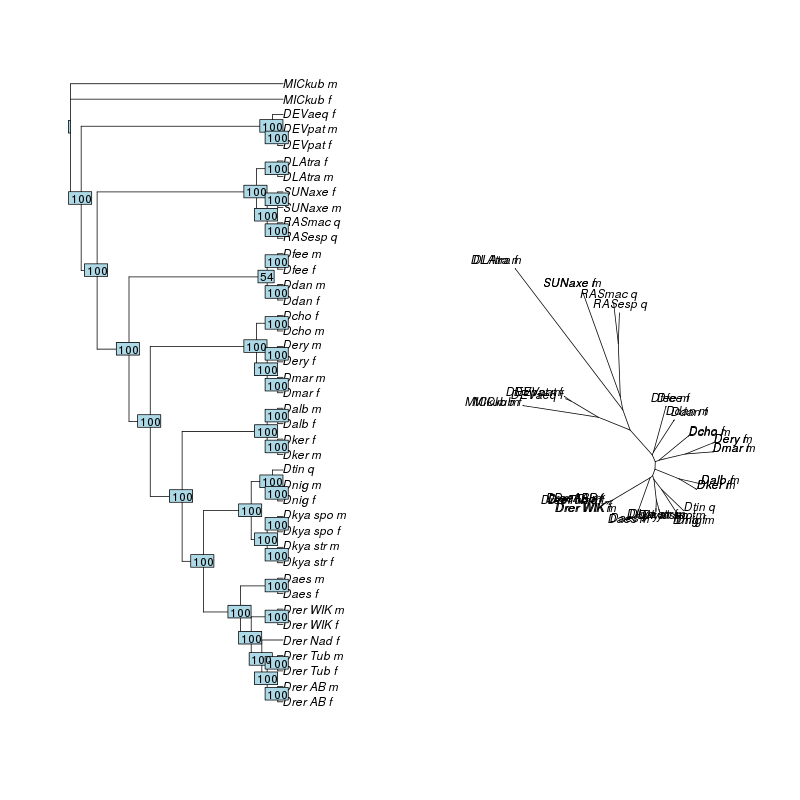

In [18]:
%%R -h 800 -w 800
library(ape)
tre <- read.tree("empirical_7/RAxML_bipartitions.empirical_7_m4")
ltre <- ladderize(tre)

par(mfrow=c(1,2))
plot(ltre, use.edge.length=F)
nodelabels(ltre$node.label)

plot(ltre, type='u')

### Get phylo distances (GTRgamma dist)

In [16]:
%%R
mean(cophenetic.phylo(ltre))

[1] 0.1124247
